In [59]:
import pickle
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import KFold, train_test_split, TimeSeriesSplit
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# load the model from disk
filename = '../models/svm_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.read_csv("../data/processed/predictive_maintenance.csv").set_index("UDI")
target=df.pop('Target')

c:\Users\julie.ngan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.1.3 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [61]:
df.insert(0, 'Target',target)
df

,Target,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
UDI,,,,,,,,,
1,0,298.1,308.6,1551,42.8,0,0,0,1
2,0,298.2,308.7,1408,46.3,3,0,1,0
3,0,298.1,308.5,1498,49.4,5,0,1,0
4,0,298.2,308.6,1433,39.5,7,0,1,0
5,0,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...,...
9996,0,298.8,308.4,1604,29.5,14,0,0,1
9997,0,298.9,308.4,1632,31.8,17,1,0,0
9998,0,299.0,308.6,1645,33.4,22,0,0,1


In [62]:

train, test = train_test_split(df, test_size=0.33, random_state=42)

to_model_columns= train.columns[1::]
X_train = train[to_model_columns]
Y_train = train.Target
X_test = test[to_model_columns]
Y_test = test.Target

Y_pred = loaded_model.predict(X_test)

cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.9942424242424243


In [54]:
test[test.Target==1]

,Target,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
UDI,,,,,,,,,
4685,1,303.6,311.8,1421,44.8,101,0,0,1
6341,1,300.5,309.9,1397,45.9,210,1,0,0
3788,1,302.3,310.8,1377,47.3,22,0,1,0
1124,1,296.6,307.7,1386,62.3,100,1,0,0
4072,1,301.9,310.6,1331,68.6,85,0,1,0
...,...,...,...,...,...,...,...,...,...
4763,1,303.7,312.0,2663,11.4,71,0,0,1
2859,1,300.5,309.3,1417,51.5,231,0,1,0
4534,1,302.4,310.3,1375,52.5,161,0,0,1


c:\Users\julie.ngan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


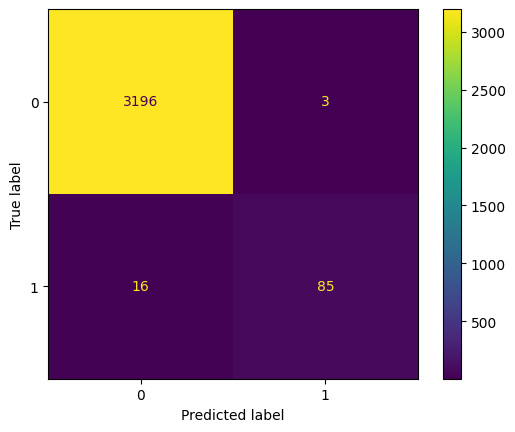

In [63]:
plot_confusion_matrix(loaded_model, X_test, Y_test)  
plt.show()

In [64]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       0.97      0.84      0.90       101

    accuracy                           0.99      3300
   macro avg       0.98      0.92      0.95      3300
weighted avg       0.99      0.99      0.99      3300



Mean Accuracy

In [66]:
loaded_model.score(X_test, Y_test)

0.9942424242424243